In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# 1. CIFAR-10 데이터셋 로드
# CIFAR-10 데이터셋은 10개의 클래스(비행기, 자동차, 새 등)를 포함한 32x32 크기의 이미지들로 구성
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터 정규화: 픽셀 값을 0~1 사이로 스케일링
# CIFAR-10 데이터는 0~255 범위의 픽셀 값을 가지므로, 255로 나누어 0~1 범위로 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 레이블을 원-핫 인코딩
# 0~9의 정수 형태를 10차원의 벡터로 변환합니다.
# to_categorical 함수는 num_classes 매개변수로 클래스를 명시할 수 있으며, 기본값은 데이터에서 자동으로 추정됩니다.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


In [2]:
# 2. 사전 학습된 VGG16 모델 로드
# VGG16 모델을 불러옴
# include_top=False로 설정하여 마지막 Fully Connected Layer를 제거
# weights='imagenet'은 ImageNet 데이터셋으로 학습된 가중치를 사용
# input_shape는 입력 데이터의 형상을 정의하며
# (32, 32, 3)은 CIFAR-10 데이터셋에 맞는 크기입니다.
vgg16_base = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(32, 32, 3)
                   )

# 모델의 가중치를 고정 (전이 학습용)
# trainable=False로 설정하면 VGG16의 가중치가 고정되어 업데이트되지 않습니다.
vgg16_base.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# 3. 새로운 모델 정의
# VGG16의 출력 위에 우리의 새로운 분류기를 추가
# Sequential 모델은 레이어를 순차적으로 쌓아올리는 단순한 방식의 모델
model = models.Sequential([
vgg16_base, # 사전 학습된 VGG16 모델
layers.Flatten(), # 평탄화: 다차원 데이터를 1차원으로 변환
layers.Dense(256, activation='relu'), # Fully Connected Layer 추가, 256개의 뉴런 사용
# activation: 활성화 함수, 'relu' 외에도 'sigmoid', 'tanh' 등
layers.Dropout(0.5), # 드롭아웃: 과적합 방지를 위해 일부 뉴런을 무작위로 비활성화
# rate: 드롭아웃 비율, 0.5는 50%의 뉴런을 비활성화
layers.Dense(10, activation='softmax') # CIFAR-10 클래스에 맞는 출력, 10개의 뉴런과 softmax 활성화 함수
# softmax는 출력값을 확률로 변환하여 다중 클래스 분류에 사용
])

# 모델 컴파일
# optimizer: 최적화 알고리즘, 'adam', 'sgd', 'rmsprop' 등
# loss: 손실 함수, 다중 클래스 분류에서는 'categorical_crossentropy'를 사용
# metrics: 평가 지표, 'accuracy' 외에도 'precision', 'recall' 등을 추가할 수 있음
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
# 4. 모델 학습
# fit 함수는 모델을 학습시키는 데 사용
# validation_data: 검증 데이터 (x_test, y_test)를 지정하여 학습 중 검증 정확도를 확인
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)
# epochs: 학습 반복 횟수, 기본값은 1
# batch_size: 한 번에 학습에 사용하는 데이터 샘플 수, 기본값은 32

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 221s 282ms/step - accuracy: 0.3930 - loss: 1.7078 - val_accuracy: 0.5518 - val_loss: 1.2831
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 273s 296ms/step - accuracy: 0.5349 - loss: 1.3273 - val_accuracy: 0.5728 - val_loss: 1.2244
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 258s 290ms/step - accuracy: 0.5595 - loss: 1.2592 - val_accuracy: 0.5873 - val_loss: 1.1877
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 262s 290ms/step - accuracy: 0.5794 - loss: 1.2021 - val_accuracy: 0.5847 - val_loss: 1.1856
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 262s 291ms/step - accuracy: 0.5865 - loss: 1.1859 - val_accuracy: 0.5934 - val_loss: 1.1603
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 227s 290ms/step - accuracy: 0.5954 - loss: 1.1564 - val_accuracy: 0.5962 - val_loss: 1.1525
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 225s 288ms/step - accuracy: 0.5942 - loss: 1.1506 - val_accuracy: 0.6035 - val_loss: 1.1359
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 153s 196ms/step - accuracy: 0.6038 -

In [5]:
# 5. Fine-Tuning (세부 조정)
# VGG16의 일부 층을 학습 가능하도록 설정
for layer in vgg16_base.layers[-4:]: # 마지막 4개 층만 학습 가능하도록 설정
    layer.trainable = True

# 모델 재컴파일 (Fine-Tuning 적용 후)
# 학습률(learning_rate)을 낮추어 가중치를 더 세밀하게 조정
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy',
metrics=['accuracy'])

# Fine-Tuning 학습 진행
fine_tune_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 299s 381ms/step - accuracy: 0.6421 - loss: 1.0262 - val_accuracy: 0.6640 - val_loss: 0.9728
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 395s 505ms/step - accuracy: 0.6949 - loss: 0.8709 - val_accuracy: 0.6825 - val_loss: 0.9191
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 299s 382ms/step - accuracy: 0.7261 - loss: 0.7791 - val_accuracy: 0.6933 - val_loss: 0.8813
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 295s 377ms/step - accuracy: 0.7489 - loss: 0.7105 - val_accuracy: 0.7073 - val_loss: 0.8541
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 294s 376ms/step - accuracy: 0.7620 - loss: 0.6618 - val_accuracy: 0.7121 - val_loss: 0.8411


In [6]:
# 6. 모델 평가
# 학습 후 테스트 데이터셋에서 모델 성능 평가
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step - accuracy: 0.7137 - loss: 0.8336
Test Loss: 0.8411478400230408
Test Accuracy: 0.7121000289916992


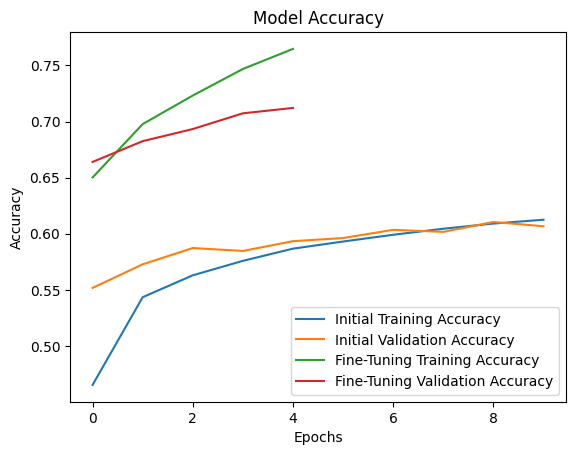

In [7]:
# 7. 결과 시각화
import matplotlib.pyplot as plt
# 학습 및 검증 정확도 시각화
plt.plot(history.history['accuracy'], label='Initial Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Initial Validation Accuracy')
plt.plot(fine_tune_history.history['accuracy'], label='Fine-Tuning Training Accuracy')
plt.plot(fine_tune_history.history['val_accuracy'], label='Fine-Tuning Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()